In [99]:
import csv
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import csv
from utils import *
%load_ext autoreload
%autoreload 2
import random
with open('TSPD.csv', newline='') as csvfile:
    data = list(csv.reader(csvfile, delimiter=';'))
    for item in range(len(data)):
        i = data[item]
        data[item] = [int(i[0]),int(i[1]),int(i[2])]
data = data

# data = np.array([(0, 0), (1, 2), (2, 4), (3, 1), (7, 3), (2,5), (4,4)]) * 10
NR_NODES = len(data)
HALF_NODES = int(len(data)/2)
print(data)
print(NR_NODES)

if len(data[0])==2:
    is_cost = False
else:
    is_cost = True
print("is_cost",is_cost)
matrix, cost_list =  get_dist_matrix_and_cost(data, cost=is_cost)
matrix



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
[[2907, 1115, 464], [3433, 183, 932], [2237, 74, 130], [91, 583, 503], [3053, 1867, 496], [2698, 436, 283], [1940, 1520, 735], [1251, 807, 893], [1415, 700, 128], [472, 498, 979], [1537, 1883, 759], [2839, 370, 754], [1083, 1307, 27], [702, 196, 680], [1393, 917, 523], [2901, 1231, 978], [1650, 1001, 65], [2111, 323, 785], [1596, 1302, 48], [2260, 1365, 382], [1427, 425, 871], [603, 513, 421], [1967, 1119, 827], [3781, 1575, 818], [3506, 628, 263], [3877, 1877, 102], [3019, 651, 468], [3070, 845, 868], [415, 1327, 577], [1782, 1395, 397], [1470, 76, 881], [3361, 93, 210], [1275, 65, 513], [1879, 1535, 347], [3019, 396, 142], [111, 1959, 973], [3818, 1948, 163], [3441, 1571, 322], [3882, 128, 122], [18, 481, 996], [1610, 511, 488], [3355, 1511, 863], [3613, 56, 599], [3408, 1072, 594], [520, 950, 44], [48, 791, 582], [2654, 1329, 755], [1047, 1727, 522], [1865, 88, 822], [3670, 1131, 786], [3577, 937

array([[  inf, 1070., 1237., ...,  685.,  444.,  821.],
       [1070.,   inf, 1200., ...,  410., 1378., 1790.],
       [1237., 1200.,   inf, ...,  985., 1114., 1358.],
       ...,
       [ 685.,  410.,  985., ...,   inf,  968., 1379.],
       [ 444., 1378., 1114., ...,  968.,   inf,  413.],
       [ 821., 1790., 1358., ..., 1379.,  413.,   inf]])

********** EXPERIMENT: CONSECUTIVE START FROM EVERY NODE **********
0 72937.0
1 75521.0
2 74279.0
3 67927.0
4 69329.0
5 68442.0
6 72818.0
7 69051.0
8 69000.0
9 67362.0
10 75311.0
11 67400.0
12 67289.0
13 68651.0
14 67339.0
15 74532.0
16 69548.0
17 67055.0
18 69602.0
19 71843.0
20 70012.0
21 71998.0
22 72116.0
23 66729.0
24 72927.0
25 72967.0
26 70795.0
27 71477.0
28 68534.0
29 68134.0
30 69390.0
31 73692.0
32 69413.0
33 70207.0
34 76170.0
35 68575.0
36 67750.0
37 74192.0
38 65359.0
39 67849.0
40 66523.0
41 70637.0
42 71715.0
43 72961.0
44 69026.0
45 67763.0
46 71110.0
47 68836.0
48 72180.0
49 69245.0
50 72865.0
51 70375.0
52 66570.0
53 68095.0
54 72218.0
55 74226.0
56 74345.0
57 70041.0
58 66136.0
59 68496.0
60 68769.0
61 70828.0
62 66858.0
63 66966.0
64 69875.0
65 70429.0
66 69537.0
67 68004.0
68 74716.0
69 71392.0
70 70902.0
71 70062.0
72 67660.0
73 71155.0
74 71681.0
75 74485.0
76 76668.0
77 73406.0
78 68151.0
79 74907.0
80 71372.0
81 75138.0
82 67959.0
83 70114.0
84 66359.0
85 7125

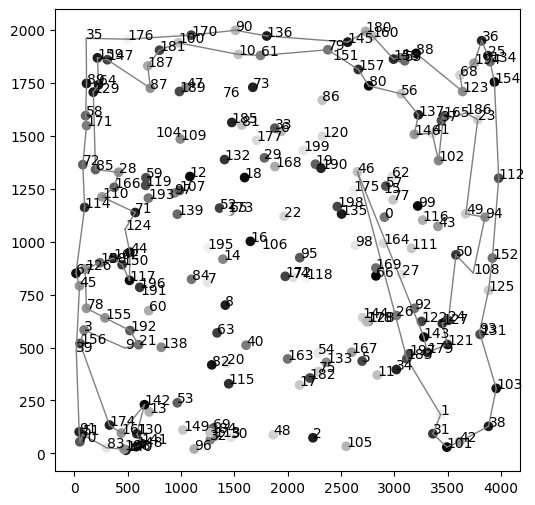

In [103]:
# START FROM EVERY NODE
print("*"*10,"EXPERIMENT: CONSECUTIVE START FROM EVERY NODE", "*"*10)

every_node_list = list(range(NR_NODES))

result_every_random, best_every_random,best_ind_every_random =  repeat(two_regret_greedy_cycle, every_node_list , matrix, cost_list, NR_NODES, HALF_NODES)
print("\nFOR 2-regret")
present_statistic(result_every_random)
plotMap(data, best_every_random)


In [101]:
from copy import deepcopy
a = np.array([1,2,3,4])
b = np.array([0,0,5,5])
np.minimum(a,b)


array([0, 0, 3, 4])